In [3]:
import pandas as pd
import numpy as np

import pathlib
import os

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

COLUMNS_NO_FEATURES = ['id', 'tile', 'cnt', 'ra_k', 'dec_k', 'vs_type', 'vs_catalog', 'cls'] 

In [20]:
PATH = pathlib.Path(os.path.abspath(os.path.dirname("")))

In [21]:
DATA_PATH = PATH / "bin"

In [145]:
for d in DATA_PATH.glob("*.pkl.bz2"):
    tile = d.name.split(".")[0]

    original = pd.read_pickle(d)
    
    new_path = f"/home/jbcabral/carpyncho3/production_data/stored/light_curves/{tile}/features_{tile}.npy"
    new = pd.DataFrame(np.load(new_path, allow_pickle=True))
    new = new[new.id.isin(original.id)]
    new["vs_type"] = new.vs_type.str.decode("utf-8")
    new["cls"] = new.vs_type.apply(lambda t: 1 if t != "" else 0)
    new["tile"] = new.id.apply(lambda i: "b" + str(i)[1:4])
#     break
    
    
    new.to_pickle(d, compression="bz2")
    print(d)

/home/jbcabral/how_far_can_we_go/bin/b206.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b214.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b216.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b220.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b228.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b234.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b247.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b248.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b261.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b262.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b263.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b264.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b277.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b278.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b360.pkl.bz2
/home/jbcabral/how_far_can_we_go/bin/b396.pkl.bz2


In [146]:
df = pd.read_pickle("_data/s20k.pkl.bz2")

In [151]:
for x in df.columns:
    if df[x].dtype == object:
        continue
    if np.isinf(df[x].values).sum():
        print(x)

Period_fit


In [153]:

print (df[np.isinf(df.Period_fit.values)].shape)

print( df[np.isinf(df.Period_fit.values)].vs_type.unique())

(1, 72)
['']


In [6]:
for d in DATA_PATH.glob("*.pkl.bz2"):
    df = pd.read_pickle(d)
    break

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_pickle("_data/sO2O.pkl.bz2")

In [3]:
import seaborn as sns

In [17]:
df =df.drop(["StetsonK"], axis=1)

In [18]:
X_columns = [c for c in df.columns if c not in ['id', 'tile', 'cnt', 'ra_k', 'dec_k', 'vs_type', 'vs_catalog', 'cls'] ]

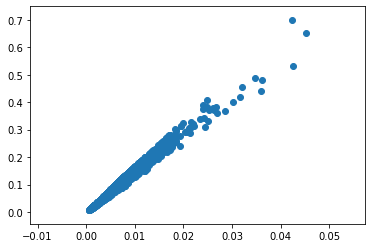

In [9]:
plt.scatter(df.Meanvariance, df.Std)

In [ ]:
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# aca cargo los datos
all_data = pd.concat(data.values(), ignore_index=True)

# aca le calculo la correlacion a todo
corr = all_data[X_columns].corr(method="pearson").values
corr = np.abs(np.tril(corr, -1))

# todo lo que es menos .9 lo plancho a 0
corr[corr < .9] = 0

# calculo las distancias con el 1 - triangulo inf (tril)
distances = linkage(1-corr, method="single", optimal_ordering=True)

# grafico el dendograma
fig, ax = plt.subplots(figsize=(15, 8))
ddata = dendrogram(distances, labels=X_columns, ax=ax); 

plt.tight_layout()
# fig.savefig("plots/s_features/dendro.pdf")

In [5]:
import pandas as pd

In [12]:
pd.read_pickle("_data/full.pkl.bz2").Mean.describe()

count    3.162089e+06
mean     1.487587e+01
std      1.599968e+00
min      8.331102e+00
25%      1.370205e+01
50%      1.522719e+01
75%      1.616406e+01
max      1.756742e+01
Name: Mean, dtype: float64

In [11]:
df.Mean.describe()

count    316165.000000
mean         15.135144
std           1.152549
min          11.936758
25%          14.379038
50%          15.490664
75%          16.091591
max          16.583933
Name: Mean, dtype: float64

In [4]:
df=pd.read_pickle("_data/full.pkl.bz2")

In [5]:
def sample(df, **k):
    sample = []
    for t, g in df.groupby("tile"):
        rr = g[g.cls == 1]
        unk = g[g.cls == 0].sample(**k)
        sample.extend([rr, unk])
    return pd.concat(sample)

def sample_o2o(df):
    sample = []
    for t, g in df.groupby("tile"):
        rr = g[g.cls == 1]
        unk = g[g.cls == 0].sample(len(rr))
        sample.extend([rr, unk])
    return pd.concat(sample)

In [8]:
s10p = sample(df, frac=.1)
s20k = sample(s10p, n=20000)
s5k = sample(s20k, n=5000)
s2_5k = sample(s5k, n=2500)
sO2O = sample_o2o(s2_5k)

import joblib
joblib.dump({
    0.1: s10p.id.values,
    20000: s20k.id.values,
    5000: s5k.id.values,
    2500: s2_5k.id.values,
    'O2O': sO2O.id.values
}, "bin/sampleids3.pkl")

['bin/sampleids3.pkl']

In [13]:
df.saple(frac=.10).shape

(2529969, 70)

In [15]:
df.sample(frac=.10).shape

(252997, 70)

In [46]:
joblib.load("bin/sampleids.pkl")

{5000: array([32060000010787, 32060000010888, 32060000016652, ...,
        33960000541057, 33960000988381, 33960000610181]),
 2500: array([32060000010787, 32060000010888, 32060000016652, ...,
        33960000349955, 33960000611577, 33960000339073]),
 'O2O': array([32060000010787, 32060000010888, 32060000016652, ...,
        33960000131250, 33960000712054, 33960000826229]),
 20000: array([32060000000932, 32060000000949, 32060000000951, ...,
        33960000995228, 33960000995237, 33960000995262])}

In [49]:
import pandas as pd
df=pd.read_pickle("_data/full.pkl.bz2")

In [71]:
import numpy as np
import pandas as pd

from PyAstronomy.pyasl import foldAt

import feets.preprocess

In [4]:
lc = np.load("/home/jbcabral/carpyncho3/production_data/stored/light_curves/b278/lc_obs_b278.npy")

In [16]:
lc = lc[(lc["bm_src_id"] == 32780000002917) | (lc["bm_src_id"] == 32780000005228)]
lc = pd.DataFrame(lc)

Signature:
feets.preprocess.remove_noise(
    time,
    magnitude,
    error,
    error_limit=3,
    std_limit=5,
)
Docstring:
Points within 'std_limit' standard deviations from the mean and with
errors greater than 'error_limit' times the error mean are
considered as noise and thus are eliminated.
File:      ~/miniconda2/envs/howfar/lib/python3.7/site-packages/feets/preprocess.py
Type:      function


In [92]:
def get_ts(df, id):
    ts = df[df.bm_src_id == id]
    time, mag, err = (
        ts.pwp_stack_src_hjd.values, 
        ts.pwp_stack_src_mag3.values, 
        ts.pwp_stack_src_mag_err3.values)
    
    sort = np.argsort(time)
    
    time, mag, err = time[sort], mag[sort], err[sort]
    print(len(time))
    time, mag, err = feets.preprocess.remove_noise(time, mag, err, std_limit=3)
    print(len(time))
    return time, mag, err


def plot_lc(tax, pax, sid):
    time, mag, err = get_ts(lc, sid)
    
    tax.errorbar(time, mag, err, ls="", marker="o", ecolor="k")
    tax.set_title(f"Source '{sid}' in time")
    tax.set_xlabel("Time")
    tax.set_ylabel("Magnitude")
    tax.invert_yaxis()
    
    t0 = np.min(mag)
    period = df[df.id == sid].PeriodLS.values[0]
    
    phases = foldAt(time, period, T0=t0)
    sort = np.argsort(phases)
    
    phases, pmag, perr = phases[sort], mag[sort], err[sort]
    phases = np.hstack((phases, phases + 1))
    pmag = np.hstack((pmag, pmag))
    perr = np.hstack((perr, perr))
    
    
    pax.errorbar(phases, pmag, perr, ls="", marker="o", ecolor="k", color="r")
    pax.set_title(f"Source '{sid}' in phase - Period={period}, t0={t0}")
    pax.set_xlabel("Phase")
    pax.set_ylabel("Magnitude")
    pax.invert_yaxis()
    
    
    


60
58


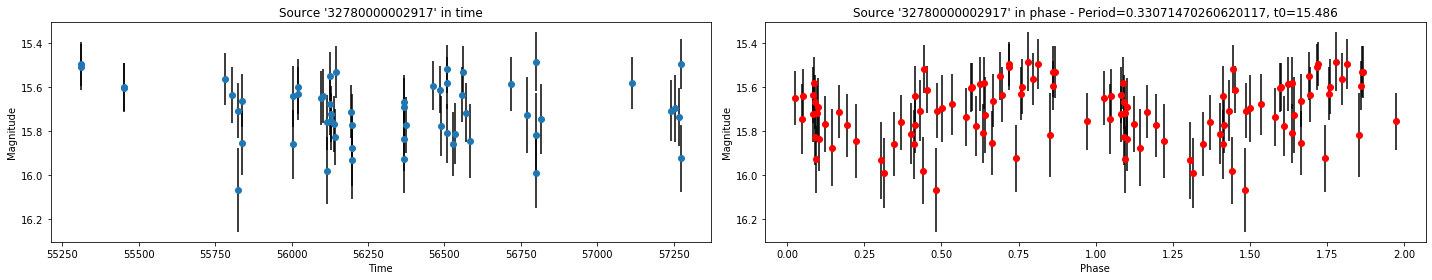

In [93]:
sid = 32780000002917

fig, axs = plt.subplots(1, 2, figsize=(20, 4))
plot_lc(*axs, sid=sid)

fig.tight_layout()

114
114


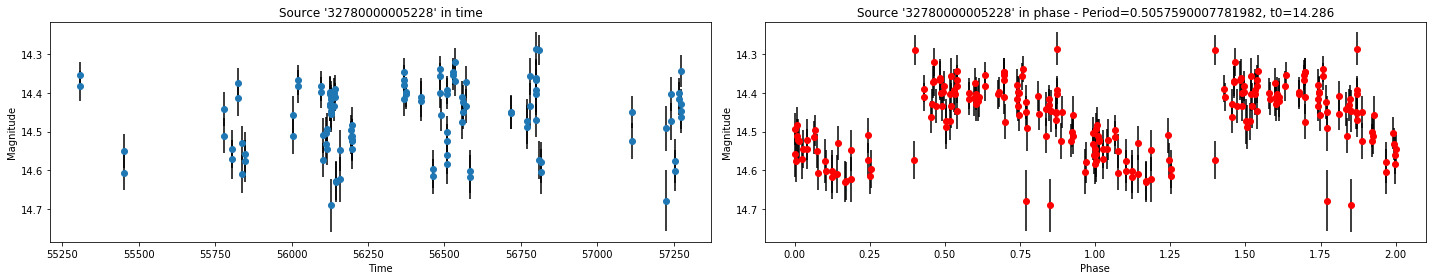

In [94]:
sid = 32780000005228

fig, axs = plt.subplots(1, 2, figsize=(20, 4))
plot_lc(*axs, sid=sid)


fig.tight_layout()

In [87]:
df2 = pd.read_pickle("_data/full_scaled.pkl.bz2")

In [91]:
df[df.id.isin([32780000002917, 32780000005228])].to_csv("to_pablo.csv", index=False)

In [97]:
df2[df2.id.isin([32780000002917, 32780000005228])]["id Period_fit    Psi_eta    PeriodLS   Psi_CS       Skew n09_jh_color       Mean".split()]

,id,Period_fit,Psi_eta,PeriodLS,Psi_CS,Skew,n09_jh_color,Mean
1232584,32780000002917,0.350058,-0.184075,-0.089428,1.668318,0.350307,-1.250178,0.778916
1233298,32780000005228,-3.498567,-2.812124,-0.066366,1.566572,0.331001,-1.178448,-0.254643


In [ ]:
       Period_fit    Psi_eta    PeriodLS   Psi_CS       Skew n09_jh_color       Mean
10384  0.3289593 -0.2615279 -0.08669450 1.736924 0.06582776    -1.163823  0.5229311
10389 -3.3952236 -2.6802177 -0.08656242 1.639955 0.05954095    -1.089007 -0.5671582

In [99]:
df3 = pd.read_pickle("_data/s5k.pkl.bz2").to_csv("to_pablo5k.csv.bz2", index=False, compression="bz2")